In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from pyBedGraph import BedGraph
from pybedtools import BedTool
import scipy.stats
from scipy.stats import gaussian_kde as kde
from matplotlib.colors import Normalize
from matplotlib import cm

In [2]:
def read_txt(directory, file_name):
    with open(directory + file_name) as f:
        summ = []
        for line in f:
            tmp = line.strip().split("\t")
            summ.append(tmp)
    return summ

In [3]:
def makeColours( vals ):
    colours = np.zeros( (len(vals),3) )
    norm = Normalize( vmin=vals.min(), vmax=vals.max() )

    #Can put any colormap you like here.
    colours = [cm.ScalarMappable( norm=norm, cmap='jet').to_rgba( val ) for val in vals]

    return colours

In [4]:
def plotscatter(x1,x2,  tit, xlab, ylab, fig_name):
    samples = np.array([x1, x2])
    densObj = kde( samples )
    colours = makeColours( densObj.evaluate( samples ) )
    plt.figure(figsize=(7,7))
    plt.scatter( samples[0], samples[1], color=colours , alpha = 0.5, edgecolors='none')
    plt.xlabel(xlab, fontsize=16)
    plt.ylabel(ylab, fontsize=16)
    plt.tick_params(axis='both', labelsize=14)
    pearson = round(scipy.stats.pearsonr(x1, x2)[0], 2)
    spearman = round(scipy.stats.spearmanr(x1, x2)[0], 2)
    plt.title(tit+ "\n Pearson = " + str(pearson)+", Spearman = " + str(spearman) + ", n="+str(len(x1)), fontsize=15)
    plt.savefig(fig_name + ".pdf", dpi=150, bbox_inches='tight')
    plt.show()

In [5]:
def write_result(directory, out_list, out_name):
    with open(directory+out_name, 'a') as file1:
        for i in range(len(out_list)):
            file1.write('\t'.join(map(str, out_list[i])) + '\n')
    file1.close()

In [6]:
directory='/Users/kimm/Desktop/GM12878_files/'
rnapii_file = 'GM12878-RNAPII_SE_node-dgrees.txt'
cohesin_file = 'GM12878-cohesin_SE_node-dgrees.txt'

In [7]:
rnapii = read_txt(directory, rnapii_file)

In [8]:
cohesin = read_txt(directory, cohesin_file)

In [10]:
sedeg = {}
for x in cohesin:
    sedeg[x[0]] = [int(x[1]), 0]

In [11]:
for x in rnapii:
    if x[0] in sedeg.keys():
        sedeg[x[0]][1] = int(x[1])
    else:
        sedeg[x[0]] = [0, int(x[1])]
        print(x[0])

In [13]:
len(sedeg)

2008

In [17]:
x1 = [x[0] for x in list(sedeg.values())] # cohesin
x2 = [x[1] for x in list(sedeg.values())] # rnapii

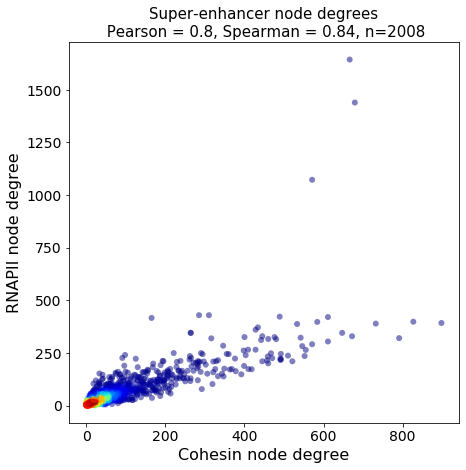

In [18]:
plotscatter(x1, x2,  "Super-enhancer node degrees",'Cohesin node degree', 'RNAPII node degree', 'cohesin_rnapii_superenhancer_node_degrees_scatterplot_20200902')